In [1]:
import turicreate
image_train = turicreate.SFrame('image_train_data/')
image_test = turicreate.SFrame('image_test_data/')


,SArray
0,

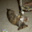

In [2]:
image_train['image'][image_train['id']==45646].explore()

In [3]:
knn_model = turicreate.nearest_neighbors.create(image_train,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 9.076ms      |

| Done         |         | 100         | 102.967ms    |

+--------------+---------+-------------+--------------+

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 9.236ms      |

| Done         |         | 100         | 89.226ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

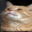
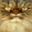
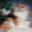
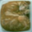
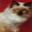

In [4]:
cat = image_train[18:19]
knn_model.query(cat)
def get_images_from_ids(query_result):
    return image_train.filter_by(query_result['reference_label'],'id')
get_images_from_ids(knn_model.query(cat))['image'].explore()

In [5]:
dog_frame=image_train[image_train["label"]=="dog"]

In [6]:
cat_frame=image_train[image_train["label"]=="cat"]

In [7]:
bird_frame=image_train[image_train["label"]=="bird"]

In [8]:
car_frame=image_train[image_train["label"]=="automobile"]

In [9]:
dog_model = turicreate.nearest_neighbors.create(dog_frame,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [10]:
cat_model = turicreate.nearest_neighbors.create(cat_frame,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [11]:
bird_model = turicreate.nearest_neighbors.create(bird_frame,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [12]:
car_model = turicreate.nearest_neighbors.create(car_frame,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [13]:
show_neighbors = lambda i: get_images_from_ids(knn_model.query(image_data[i:i+1]))['image'].explore()

,SArray
0,

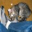

In [14]:
image_test[0:1]["image"].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 7.126ms      |

| Done         |         | 100         | 39.355ms     |

+--------------+---------+-------------+--------------+

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 7.883ms      |

| Done         |         | 100         | 35.636ms     |

+--------------+---------+-------------+--------------+

+-------------+-----------------+--------------------+------+
| query_label | reference_label |      distance      | rank |
+-------------+-----------------+--------------------+------+
|      0      |      16289      | 34.62371920804245  |  1   |
|      0      |      45646      | 36.00687992842462  |  2   |
|      0      |      32139      | 36.52008134363789  |  3   |
|      0      |      25713      | 36.754850252057054 |  4   |
|      0      |       331       | 36.87312281675268  |  5   |
+-------------+-----------------+--------------------+------+
[5 rows x 4 columns]



Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 6.753ms      |

| Done         |         | 100         | 36.798ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

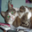
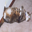
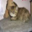
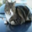
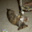

36.15573070978294

In [15]:
cat_dist=cat_model.query(image_test[0:1])
print(cat_model.query(image_test[0:1]))
# def get_images_from_ids(query_result):
#     return image_train.filter_by(query_result['reference_label'],'id')
get_images_from_ids(cat_model.query(image_test[0:1]))['image'].explore()
cat_dist["distance"].mean()

In [17]:
# image_train[16289]["image"].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 5.437ms      |

| Done         |         | 100         | 28.888ms     |

+--------------+---------+-------------+--------------+

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 6.491ms      |

| Done         |         | 100         | 32.138ms     |

+--------------+---------+-------------+--------------+

+-------------+-----------------+--------------------+------+
| query_label | reference_label |      distance      | rank |
+-------------+-----------------+--------------------+------+
|      0      |      16976      | 37.464262878423774 |  1   |
|      0      |      13387      | 37.56668321685285  |  2   |
|      0      |      35867      | 37.60472670789396  |  3   |
|      0      |      44603      | 37.70655851529755  |  4   |
|      0      |       6094      | 38.511325490739715 |  5   |
+-------------+-----------------+--------------------+------+
[5 rows x 4 columns]



,SArray
0,

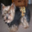

37.77071136184157

In [18]:
dog_dist=dog_model.query(image_test[0:1])
print(dog_model.query(image_test[0:1]))
image_train['image'][image_train['id']==16976].explore()
# get_images_from_ids(dog_model.query(image_test[0:1]))['image'].explore()
dog_dist["distance"].mean()

In [19]:
dog_test_frame=image_test[image_test["label"]=="dog"]
cat_test_frame=image_test[image_test["label"]=="cat"]
car_test_frame=image_test[image_test["label"]=="automobile"]
bird_test_frame=image_test[image_test["label"]=="bird"]


In [20]:
dog_cat_neighbors = cat_model.query(dog_test_frame,k=1)
dog_automobile_neighbors = car_model.query(dog_test_frame,k=1)
dog_bird_neighbors = bird_model.query(dog_test_frame,k=1)
dog_dog_neighbors = dog_model.query(dog_test_frame,k=1)

# get_images_from_ids(cat_model.query(dog_cat_neighbors))['image'].explore()


Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 275.518ms    |

| Done         | 509000  | 100         | 360.404ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 337.992ms    |

| Done         | 509000  | 100         | 388.448ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 60000   | 12.5523     | 290.795ms    |

| Done         | 478000  | 100         | 375.308ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 281.373ms    |

| Done         | 509000  | 100         | 349.252ms    |

+--------------+---------+-------------+--------------+

In [21]:
dog_distances=turicreate.SFrame()

In [22]:
dog_distances['dog-cat'] =dog_cat_neighbors["distance"]
dog_distances['dog-automobile'] =dog_automobile_neighbors["distance"]
dog_distances['dog-bird'] =dog_bird_neighbors["distance"]
dog_distances['dog-dog'] =dog_dog_neighbors["distance"]

In [23]:
dog_distances

dog-cat,dog-automobile,dog-bird,dog-dog
36.419607706754384,41.95797614571203,41.75386473035126,33.47735903726335
38.83532688735542,46.00213318067788,41.3382958924861,32.84584956840554
36.97634108541546,42.946229069238804,38.615759085289056,35.03970731890584
34.575007291446106,41.68660600484793,37.08922699538214,33.90103276968193
34.77882479101661,39.22696649347584,38.27228869398105,37.484925090925636
35.11715782924591,40.58451176980721,39.146208923590486,34.94516534398124
40.60958309132649,45.10673529610854,40.523040105962316,39.095727834463545
39.90368673062214,41.32211409739762,38.19479183926956,37.76961310322034
38.067470016821176,41.82446549950164,40.156713166131446,35.10891446032838
42.72587329506032,45.497692940110376,45.55979626027668,43.242283258453455


In [61]:
import pandas as pd
import numpy as np
dog_distances_pd=pd.DataFrame(dog_distances)
dog_distances_pd['res']=np.nan


In [94]:
import numpy as np
def is_dog_correct(dog_distances):
    count_0=0
    count_1=0
    for i in range(len(dog_distances)):
        t=np.array([dog_distances.iloc[i]['dog-dog'],dog_distances.iloc[i]['dog-cat'],dog_distances.iloc[i]['dog-automobile'],dog_distances.iloc[i]['dog-bird']])
        print(t.min(),dog_distances.iloc[i]['dog-dog'],i)
        
        if t.min()!=t[0]:
            dog_distances['res']=0
            print(dog_distances.iloc[i]['res'])
            
            count_0+=1
            print(count_0)
            
            print("hii")
        elif t.min()==t[0]:
#             print("1")
            dog_distances['res']=1
            print(dog_distances.iloc[i]['res'])
    
            count_1+=1
            print(count_1)
            
            
        if i==len(dog_distances)-1:
            print(count_0,count_1)


In [95]:
is_dog_correct(dog_distances_pd)

33.47735903726335 33.47735903726335 0
1.0
1
32.84584956840554 32.84584956840554 1
1.0
2
35.03970731890584 35.03970731890584 2
1.0
3
33.90103276968193 33.90103276968193 3
1.0
4
34.77882479101661 37.484925090925636 4
0.0
1
hii
34.94516534398124 34.94516534398124 5
1.0
5
39.095727834463545 39.095727834463545 6
1.0
6
37.76961310322034 37.76961310322034 7
1.0
7
35.10891446032838 35.10891446032838 8
1.0
8
42.72587329506032 43.242283258453455 9
0.0
2
hii
36.23050539743552 36.23050539743552 10
1.0
9
31.6633518591745 33.10211296474725 11
0.0
3
hii
37.71246671323843 38.03829227450411 12
0.0
4
hii
39.0045609157312 39.0045609157312 13
1.0
10
43.881054878430206 43.881054878430206 14
1.0
11
34.87732478232784 34.87732478232784 15
1.0
12
33.56918170602116 33.56918170602116 16
1.0
13
39.16089874451968 40.797808461591444 17
0.0
5
hii
33.43682808174037 33.94244484435413 18
0.0
6
hii
33.707398835100065 33.707398835100065 19
1.0
14
34.71470962990656 37.0240241366865 20
0.0
7
hii
33.237477416853 35.41524206

34.67586951421559 34.67586951421559 174
1.0
114
34.13432230393007 34.13432230393007 175
1.0
115
33.37418961244205 33.37418961244205 176
1.0
116
31.916154121028804 35.86967434258201 177
0.0
62
hii
35.733011004728496 35.733011004728496 178
1.0
117
32.21153658027685 32.21153658027685 179
1.0
118
33.166298272352336 33.166298272352336 180
1.0
119
37.42571406739173 37.42571406739173 181
1.0
120
33.827352222009864 33.827352222009864 182
1.0
121
34.765725309818244 34.765725309818244 183
1.0
122
36.97678474263526 37.22178555011058 184
0.0
63
hii
33.47096742698214 33.47096742698214 185
1.0
123
32.6262576922757 32.6262576922757 186
1.0
124
35.635751060153964 35.635751060153964 187
1.0
125
30.44795388712716 30.44795388712716 188
1.0
126
38.302830809081755 38.302830809081755 189
1.0
127
31.8834822033806 31.8834822033806 190
1.0
128
36.50679570602351 36.50679570602351 191
1.0
129
37.656058304126994 38.36814636223964 192
0.0
64
hii
35.739555846247 35.739555846247 193
1.0
130
34.11452025742623 34.9317

31.605206909152482 31.605206909152482 345
1.0
231
37.14291422438115 39.76060548592316 346
0.0
116
hii
38.842530643025746 42.13803475073702 347
0.0
117
hii
32.635489021605125 33.08770480634258 348
0.0
118
hii
34.81865045160556 36.43513698575041 349
0.0
119
hii
33.12390718774657 33.12390718774657 350
1.0
232
35.021918057949286 37.86732461000635 351
0.0
120
hii
41.849865005659325 41.849865005659325 352
1.0
233
37.49483775935703 37.49483775935703 353
1.0
234
31.883026311878506 32.96657451127551 354
0.0
121
hii
33.77614902468692 33.77614902468692 355
1.0
235
37.235104172690924 37.235104172690924 356
1.0
236
35.81624785391267 35.81624785391267 357
1.0
237
34.89644495979658 34.89644495979658 358
1.0
238
37.17787261490024 37.17787261490024 359
1.0
239
33.01030719330539 33.94634838515604 360
0.0
122
hii
43.13491610418035 43.13491610418035 361
1.0
240
37.6060786906843 37.6060786906843 362
1.0
241
32.180028943960544 35.790506729537434 363
0.0
123
hii
33.284976125687336 34.25286228377562 364
0.0
1

36.51218481826034 40.02401936836922 527
0.0
169
hii
40.997354426708455 40.997354426708455 528
1.0
360
36.9235486649739 38.3069753857295 529
0.0
170
hii
32.28375026934299 33.10185067903196 530
0.0
171
hii
39.95664455672334 39.95664455672334 531
1.0
361
31.83556873272782 31.963207177089362 532
0.0
172
hii
38.820583318006015 39.53029435807657 533
0.0
173
hii
35.961814935451656 35.961814935451656 534
1.0
362
33.47909656975692 33.47909656975692 535
1.0
363
41.81465424841575 44.7419709883514 536
0.0
174
hii
29.79753194348328 29.927442329876314 537
0.0
175
hii
28.386247489841907 28.386247489841907 538
1.0
364
29.70500744456486 29.70500744456486 539
1.0
365
31.7159083725279 31.7159083725279 540
1.0
366
33.44818784898 33.44818784898 541
1.0
367
29.84785709167551 32.0121385047065 542
0.0
176
hii
34.07157873189286 34.07157873189286 543
1.0
368
33.31388633318764 33.31388633318764 544
1.0
369
38.11626759185752 38.11626759185752 545
1.0
370
33.810739061302 35.34384594440745 546
0.0
177
hii
32.013757

34.656900709458675 34.656900709458675 703
1.0
472
38.254516702172154 38.79085479069108 704
0.0
233
hii
32.08137232237774 32.08137232237774 705
1.0
473
33.77528386951884 33.77528386951884 706
1.0
474
36.23293584031526 36.23293584031526 707
1.0
475
35.81540489823895 35.81540489823895 708
1.0
476
31.956547515764893 32.764352456416475 709
0.0
234
hii
35.76963903381537 36.48797162169027 710
0.0
235
hii
35.12842316789715 35.12842316789715 711
1.0
477
35.44949996331323 35.44949996331323 712
1.0
478
39.7304567613827 40.59659876484661 713
0.0
236
hii
32.63876852517414 32.63876852517414 714
1.0
479
35.43157856125674 35.43157856125674 715
1.0
480
41.757876475902954 41.757876475902954 716
1.0
481
31.827787740199724 31.827787740199724 717
1.0
482
31.554571654876405 31.554571654876405 718
1.0
483
43.9533694375398 43.9533694375398 719
1.0
484
34.99613361731415 34.99613361731415 720
1.0
485
33.928461864106154 35.96070866585867 721
0.0
237
hii
34.52317923402302 34.52317923402302 722
1.0
486
30.67017005

0.0
321
hii
30.517845827113444 32.52830380620665 998
0.0
322
hii
29.847315417296965 29.847315417296965 999
1.0
678
322 678


In [ ]:
dog_distances_pd

In [49]:
dog_distances_pd["res"].sum()

0

In [90]:
def is_dog_correct(row):
    t=np.array([row[3],row[0],row[1],row[2]])
#         print(t)
    if t.min()==t[0]:
        row[4]=1
    else:
        row[4]=0

In [91]:
for i in range(len(dog_distances_pd)):
    is_dog_correct(dog_distances_pd.iloc[i])

/home/prachi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/prachi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [93]:
dog_distances_pd

,dog-cat,dog-automobile,dog-bird,dog-dog,res
0,36.419608,41.957976,41.753865,33.477359,NaN
1,38.835327,46.002133,41.338296,32.845850,NaN
2,36.976341,42.946229,38.615759,35.039707,NaN
3,34.575007,41.686606,37.089227,33.901033,NaN
4,34.778825,39.226966,38.272289,37.484925,NaN
...,...,...,...,...,...
995,43.477975,44.309539,40.397740,38.874713,NaN
996,34.326577,44.519190,38.816912,35.653577,NaN
997,35.983502,42.326396,37.722022,36.515233,NaN
998,30.517846,39.457424,37.264526,32.528304,NaN


In [70]:
df = pd.DataFrame({"A": [65,2,31], "B": [2,3,4]})

In [76]:
df['c']

0    
1    
2    
Name: c, dtype: object

In [77]:
df

,A,B,c
0,65,2,
1,2,3,
2,31,4,


In [78]:
for i in range(len(df)):
    if df.loc[i]['A']<df.loc[i]['B']:
        df.loc[i]['c']=0
    else:
        df.loc[i]['c']=1
df

/home/prachi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/prachi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,A,B,c
0,65,2,
1,2,3,
2,31,4,
